# Exploring Calgary’s 311 Service Requests: Unveiling Urban Insights

The 311 Service Requests system, offered by The City of Calgary’s Citizen Services division, serves as a comprehensive platform for residents, business owners, and visitors to connect with the city government and access non-emergency services. Through this system, individuals can submit requests, seek information, and track the progress of their inquiries or service needs.

This data story aims to uncover hidden narratives within the 311 Service Requests dataset and present a comprehensive understanding of the urban landscape. I will endeavor to address the following five key inquiries:

- What are the most common types of service requests received through the 311 system?
- Which city departments are responsible for resolving the majority of service requests?
- How does the volume of service requests vary over time? Are there any noticeable patterns or trends?
- Are there any geographical patterns or disparities in the distribution of service requests across different areas of the city?
- How does the response time vary overall and for different types of service requests?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
import geopandas as gpd

In [8]:
# read the data
services311 = pd.read_csv('services_cleared.csv')

In [3]:
# info about the dataset
services311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736776 entries, 0 to 2736775
Data columns (total 24 columns):
 #   Column              Dtype  
---  ------              -----  
 0   service_request_id  object 
 1   requested_date      object 
 2   updated_date        object 
 3   closed_date         object 
 4   status_description  object 
 5   source              object 
 6   service_name        object 
 7   agency_responsible  object 
 8   address             float64
 9   comm_code           object 
 10  comm_name           object 
 11  longitude           float64
 12  latitude            float64
 13  point               object 
 14  date                object 
 15  category            object 
 16  subcategory         object 
 17  subcategory2        object 
 18  subcategory3        object 
 19  department          object 
 20  subdepartment       object 
 21  year                int64  
 22  month               int64  
 23  weekday_name        object 
dtypes: float64(3), int64(2),

In [62]:
#display first rows of the dataset
services311.head()

service_request_id            updated_date closed_date  \
requested_date                                                          
2018-10-17            18-01017964  2020/06/24 12:00:00 AM  2020-06-24   
2018-11-12            18-01094780  2020/06/24 12:00:00 AM  2020-06-24   
2021-08-17            21-00609171  2021/08/19 12:00:00 AM  2021-08-19   
2021-08-17            21-00609175  2021/08/19 12:00:00 AM  2021-08-19   
2018-07-10            18-00680955  2021/02/04 12:00:00 AM  2021-02-04   

               status_description source  \
requested_date                             
2018-10-17                 Closed  Phone   
2018-11-12                 Closed    App   
2021-08-17                 Closed  Phone   
2021-08-17                 Closed  Phone   
2018-07-10                 Closed    Web   

                                               service_name  \
requested_date                                                
2018-10-17            Roads - Traffic Signal Timing Inquiry   
2018-11-12            Roads - Traffic Signal Timing Inquiry   
2021-08-17                           Bylaw - Noise Concerns   
2021-08-17                      CBS Inspection - Electrical   
2018-07-10      Roads - Debris on Street/Sidewalk/Boulevard   

                              agency_responsible  address comm_code  \
requested_date                                                        
2018-10-17                          TRAN - Roads      NaN       SHN   
2018-11-12                          TRAN - Roads      NaN       DAL   
2021-08-17      CS - Calgary Community Standards      NaN       BLN   
2021-08-17        PD - Calgary Building Services      NaN       HAR   
2018-07-10                          TRAN - Roads      NaN       DOV   

                    comm_name  ...        category  \
requested_date                 ...                   
2018-10-17          SHAWNESSY  ...           Roads   
2018-11-12          DALHOUSIE  ...           Roads   
2021-08-17           BELTLINE  ...           Bylaw   
2021-08-17      HARVEST HILLS  ...  CBS Inspection   
2018-07-10              DOVER  ...           Roads   

                                        subcategory subcategory2 subcategory3  \
requested_date                                                                  
2018-10-17            Traffic Signal Timing Inquiry          NaN          NaN   
2018-11-12            Traffic Signal Timing Inquiry          NaN          NaN   
2021-08-17                           Noise Concerns          NaN          NaN   
2021-08-17                               Electrical          NaN          NaN   
2018-07-10      Debris on Street/Sidewalk/Boulevard          NaN          NaN   

               department                subdepartment  year month  \
requested_date                                                       
2018-10-17           TRAN                        Roads  2018    10   
2018-11-12           TRAN                        Roads  2018    11   
2021-08-17             CS  Calgary Community Standards  2021     8   
2021-08-17             PD    Calgary Building Services  2021     8   
2018-07-10           TRAN                        Roads  2018     7   

               weekday_name time_diff_hours  
requested_date                               
2018-10-17        Wednesday         14784.0  
2018-11-12           Monday         14160.0  
2021-08-17          Tuesday            48.0  
2021-08-17          Tuesday            48.0  
2018-07-10          Tuesday         22560.0  

[5 rows x 24 columns]

# What are the most common types of service requests received through the 311 system?

I extracted categories and subcategories from the ‘service name’ field. This extraction allowed for enhanced filtering options based on both main and subcategories.

In [5]:
# Variables referring to service requests categories
services_variables = ['service_name', 'category', 'subcategory', 'subcategory2', 'subcategory3']
summary_services_variables = services311[services_variables].describe(include='object')

print(summary_services_variables)

                                  service_name category  \
count                                  2736776  2736776   
unique                                     655       86   
top     Finance - Property Tax Account Inquiry    Roads   
freq                                    136262   433746   

                         subcategory subcategory2 subcategory3  
count                        2657626       719716        58664  
unique                           510          130            9  
top     Property Tax Account Inquiry          WAM      Damaged  
freq                          136262       154049        24539  


Exploring the realm of service requests received through the 311 system, we discover a fascinating revelation: the most common types that stand out. By analyzing the frequency distribution of categories, we uncover the pulse of urban life. Below, you’ll find a bar chart depicting the top 10 categories of service requests.

In [3]:
# Set the number of top categories to display
top_n = 10

# Count the frequency of each category
category_counts = services311['category'].value_counts()

# Get the top N categories
top_categories = category_counts.head(top_n)

# Define the maximum number of subcategories to display in tooltips
max_subcategories = 15

# Create a list to store the tooltip text for each category
tooltip_texts = []

# Iterate over the top categories and create the tooltip text
for category in top_categories.index:
    subcategories = services311.loc[services311['category'] == category, 'subcategory'].unique()
    if len(subcategories) > max_subcategories:
        tooltip_text = "<br>".join(subcategories[:max_subcategories]) + f"<br>and {len(subcategories) - max_subcategories} more"
    else:
        tooltip_text = "<br>".join(subcategories)
    tooltip_texts.append(tooltip_text)

# Define custom labels for ticks on the x-axis
custom_labels = {
    'CBS Inspection': 'Buildings Inspection',
    'WRS': 'Waste and Recycling',
    'Bylaw': 'Community Standards Bylaw',
    'WATS': 'Water Services',
    'AS': 'Animal Services',
    'CT': 'Calgary Transit Services'
}

# Create a bar trace for the chart
bar_trace = go.Bar(
    x=top_categories.index,
    y=top_categories.values,
    hovertemplate='<b>%{y}</b> requests<br>%{customdata}<extra></extra>',
    customdata=tooltip_texts,
    marker=dict(color='orange')
)

# Create the layout for the chart
layout = go.Layout(
    title=f'Top {top_n} Frequent Categories of Service Requests in 2018-2023',
    xaxis=dict(
        tickangle=45,
        tickfont=dict(size=10),
        title='Categories',
        ticktext=[custom_labels.get(label, label) for label in top_categories.index],
        tickvals=top_categories.index
    ),
    yaxis=dict(
        title='Service Requests'
    ),
    hoverlabel=dict(
        bgcolor='white',
        font=dict(color='black')
    )
)

# Create the figure and add the trace
fig = go.Figure(data=[bar_trace], layout=layout)

# Show the interactive chart
fig.show()

Road-related requests represent a significant portion, emphasizing the importance of maintaining a well-functioning transportation infrastructure. Building inspections, encompassing compliance and permits, highlight the community’s commitment to safety and construction standards. Requests for waste and recycling services reflect a dedication to environmental sustainability. Finance-related inquiries indicate an engaged community managing their financial obligations. Lastly, park-related requests demonstrate a desire to preserve and enhance outdoor spaces.

These insights reveal the active engagement and conscientiousness of residents towards their city. By actively requesting services related to roads, building inspections, waste management, finances, and parks, residents demonstrate their awareness and involvement in shaping the livability and sustainability of their community.

# Which city departments are responsible for resolving the majority of service requests?

I analyzed the 'agency responsible' field and extracted the departments and subdepartments from it. This extraction process enables more advanced filtering capabilities by providing options to filter based on both the department and subdepartment levels.

In [35]:
# Variables referring to agency responsible
agency_variables = ['department', 'subdepartment']
summary_agency_variables = services311[agency_variables].describe(include='object')

print(summary_agency_variables)

       department subdepartment
count     2736776       2713143
unique         25            55
top            CS         Roads
freq       785856        429771


In [4]:
# Set a threshold for displaying departments
frequency_threshold = 300000

# Count the frequency of each department
department_counts = services311['department'].value_counts()

# Filter departments based on the threshold
top_departments = department_counts[department_counts >= frequency_threshold]
other_department_count = department_counts[department_counts < frequency_threshold].sum()
top_departments['Other'] = other_department_count

# Define custom labels for ticks and tooltips
custom_labels = {
    'CS': 'Calgary Community Standards',
    'TRAN': 'Calgary Transit',
    'UEP': 'Utilities & Environmental Protection',
    'PD': 'Calgary Building Services',
    'CFOD': 'Chief Financial Officers Department',
}

# Create a list to store the tooltip text for each department
tooltip_texts = []

# Create a list to store the custom ticks for the x-axis
custom_ticks = []

# Iterate over the top departments and create the tooltip text and custom ticks
for department in top_departments.index:
    subdepartments = services311.loc[services311['department'] == department, 'subdepartment'].unique()
    tooltip_text = "<br>".join(subdepartments)
    tooltip_texts.append(tooltip_text)
    custom_ticks.append(custom_labels.get(department, department))

# Create a bar trace for the chart
bar_trace = go.Bar(
    x=top_departments.index,
    y=top_departments.values,
    hovertemplate='<b>%{y}</b> requests<br>%{customdata}<extra></extra>',
    customdata=tooltip_texts,
    marker=dict(color='orange')  # Change the color here
)

# Create the layout for the chart
layout = go.Layout(
    title='The most frequent departments responsible for requests in 2018-2023',
    xaxis=dict(
        tickangle=45,
        tickfont=dict(size=10),
        title='Departments',
        ticktext=custom_ticks,  # Add the custom ticks
        tickvals=top_departments.index  # Use the original tick values
    ),
    yaxis=dict(
        title='Service Requests'
    ),
    hoverlabel=dict(
        bgcolor='white',
        font=dict(color='black')
    )
)

# Create the figure and add the trace
fig = go.Figure(data=[bar_trace], layout=layout)

# Show the interactive chart
fig.show()



Examining the departments responsible for handling service requests, three key insights come to light. The Calgary Community Standards department takes the lead, indicating the high priority given to maintaining community standards and regulations. Calgary Transit follows closely, underscoring the vital role of efficient and accessible public transportation in urban life. The Utilities & Environmental Protection department’s presence highlights the city’s commitment to sustainable practices and safeguarding the environment. These departments, among others, play a pivotal role in addressing resident concerns and actively shaping a vibrant and livable city.

# How does the volume of service requests vary over time? Are there any noticeable patterns or trends?

Delving into the vast realm of service requests, it’s intriguing to explore how the volume of these requests fluctuates over time. By examining the data and observing any discernible patterns, we can gain valuable insights into the dynamics of service demand.

In [9]:
# Convert the 'requested_date' column to datetime
services311['requested_date'] = pd.to_datetime(services311['requested_date'])
services311['closed_date'] = pd.to_datetime(services311['closed_date'])
# Calculate the difference in hours
services311['time_diff_hours'] = (services311['closed_date'] - services311['requested_date']).dt.total_seconds() / 3600

In [10]:
# Set the requested date as the index
services311.set_index('requested_date', inplace=True)

# Resample the data by day and count the number of requests per day
daily_requests = services311.resample('D').size()

# Create a filled area trace for the chart
area_trace = go.Scatter(
    x=daily_requests.index,
    y=daily_requests.values,
    fill='tozeroy',
    fillcolor='orange',
    mode='none',
    hovertemplate='Date: %{x}<br>Service Requests: %{y}<extra></extra>',
    hoverlabel=dict(
        bgcolor='white'  # Set the background color of the tooltips to white
    )
)

# Create the layout for the chart
layout = go.Layout(
    title='Services Requests over Time (2018-2023)',
    xaxis=dict(
        title='Date',
        tickangle=45,
        tickfont=dict(size=10)
    ),
    yaxis=dict(
        title='Service Requests'
    )
)

# Create the figure and add the trace
fig = go.Figure(data=[area_trace], layout=layout)

# Show the interactive chart
fig.show()


By analyzing the area map representation of service requests, an interesting pattern emerges. We observe a zigzag pattern, indicating that there is a yearly peak of requests during the middle of the year, which coincides with the summer months. Conversely, at the beginning and end of the year, the number of requests tends to decrease. This observation suggests a seasonality in service requests, with higher demand during the warmer months.

In [11]:
import plotly.graph_objects as go

# Filter the data for June and December of 2022
start_date_june = '2022-06-01'
end_date_june = '2022-06-30'
start_date_december = '2022-12-01'
end_date_december = '2022-12-31'

services_june = services311[(services311.index >= start_date_june) & (services311.index <= end_date_june)]
services_december = services311[(services311.index >= start_date_december) & (services311.index <= end_date_december)]

# Define the specific service requests to compare
service_requests = ['Roads', 'CBS Inspection', 'WRS', 'Finance', 'Bylaw', 'Parks', 'WATS', 'AS', 'CT', 'Corporate']

# Create empty lists to store the category counts and unique subcategories for June and December
category_counts_june = []
category_counts_december = []
subcategory_lists_june = []
subcategory_lists_december = []

# Iterate over the specific service requests and count their occurrences in June and December
for request in service_requests:
    category_counts_june.append((services_june['category'] == request).sum())
    category_counts_december.append((services_december['category'] == request).sum())
    
    subcategories_june = services_june.loc[services_june['category'] == request, 'subcategory'].value_counts()
    subcategory_count_june = len(subcategories_june)
    subcategories_june = subcategories_june.head(15)
    subcategory_list_june = [f"{subcategory} ({count})" for subcategory, count in subcategories_june.iteritems()]
    if subcategory_count_june > 15:
        subcategory_list_june.append(f"and {subcategory_count_june - 15} more")
    subcategory_lists_june.append("<br>".join(subcategory_list_june))
    
    subcategories_december = services_december.loc[services_december['category'] == request, 'subcategory'].value_counts()
    subcategory_count_december = len(subcategories_december)
    subcategories_december = subcategories_december.head(15)
    subcategory_list_december = [f"{subcategory} ({count})" for subcategory, count in subcategories_december.iteritems()]
    if subcategory_count_december > 15:
        subcategory_list_december.append(f"and {subcategory_count_december - 15} more")
    subcategory_lists_december.append("<br>".join(subcategory_list_december))

# Define custom labels for ticks on the x-axis
custom_labels = {
    'CBS Inspection': 'Buildings Inspection',
    'WRS': 'Waste and Recycling',
    'Bylaw': 'Community Standards Bylaw',
    'WATS': 'Water Services',
    'AS': 'Animal Services',
    'CT': 'Calgary Transit Services'
}

# Create the bar trace for June
bar_trace_june = go.Bar(
    x=[custom_labels.get(request, request) for request in service_requests],
    y=category_counts_june,
    name='June',
    hovertemplate='<b>%{y}</b> requests<br>%{customdata}<extra></extra>',
    customdata=subcategory_lists_june,
    marker=dict(color='orange')
)

# Create the bar trace for December
bar_trace_december = go.Bar(
    x=[custom_labels.get(request, request) for request in service_requests],
    y=category_counts_december,
    name='December',
    hovertemplate='<b>%{y}</b> requests<br>%{customdata}<extra></extra>',
    customdata=subcategory_lists_december,
    marker=dict(color='purple')
)

# Create the layout for the chart
layout = go.Layout(
    title='Comparison of Service Requests in June and December 2022',
    xaxis=dict(
        title='Service Requests',
        tickangle=45,
        tickfont=dict(size=10),
    ),
    yaxis=dict(title='Count'),
    hoverlabel=dict(bgcolor='white', font=dict(color='black'))
)

# Create the figure and add the traces
fig = go.Figure(data=[bar_trace_june, bar_trace_december], layout=layout)

# Show the interactive chart
fig.show()


Let's take a closer look at the number of service requests in June and December of 2022. By examining the bar plot, it is evident that the number of requests is significantly higher in June compared to December. In particular, the Finance category shows a substantial increase in June, with subcategories such as "TIPP Agreement Request," "Property Tax Account Enquiry," and "Property Tax Document Request" experiencing a two to three-fold rise in requests.

Similarly, the Parks category also exhibits a notable surge in June, particularly in subcategories like "Tree Concern," "Mowing Request," "Maintenance," and "Infrastructure," which witnessed a significant increase in the number of service requests.

The heatmap below showcasing service requests by month and day of the week provides valuable insights into the workload distribution throughout the week.

In [12]:
# Convert the 'requested_date' column to datetime format
services311['date'] = pd.to_datetime(services311['date'])

# Pivot the data to create a matrix of count of service requests by month and day of the week
pivot_table = services311.pivot_table(index=services311['date'].dt.month,
                                       columns=services311['date'].dt.day_name(),
                                       aggfunc='size')

# Define the custom order of the columns (days of the week)
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the columns in the pivot table to match the custom order
pivot_table = pivot_table.reindex(custom_order, axis=1)

# Create the heatmap trace
heatmap_trace = go.Heatmap(
    x=pivot_table.columns,
    y=pivot_table.index,
    z=pivot_table.values,
    colorscale='Oranges',
    reversescale=False,
    hovertemplate='Month: %{y}<br>Day: %{x}<br>Service Requests: %{z}<extra></extra>',
    hoverlabel=dict(
        bgcolor='white'  # Set the background color of the tooltips to white
    )
)

# Create the layout for the chart
layout = go.Layout(
    title='Service Requests by Month and Day of the Week (2018-2023)',
    xaxis=dict(title='Day of the Week'),
    yaxis=dict(title='Month')
)

# Create the figure and add the trace
fig = go.Figure(data=[heatmap_trace], layout=layout)

# Show the interactive chart
fig.show()


It vividly illustrates that during the weekends, the number of requests decreases, indicating a lighter workload. Conversely, the work weeks, particularly in June, appear to be busier, with a higher volume of requests. This visual matrix serves as a helpful tool for understanding potential patterns in request completion delays and identifying periods when additional staff may be required to efficiently handle the workload.

# Are there any geographical patterns or disparities in the distribution of service requests across different areas of the city?

To create a more informative representation of the distribution of requests among different communities, I decided to incorporate a geospatial dataset containing community boundaries. By merging this dataset with my request data, I was able to generate a map that highlights the spatial distribution and intensity of requests across various communities.

The color of each area represents the intensity of requests, providing a visual representation of the varying levels of activity across the communities. The additional information can be found in the tooltip.

In [13]:
from bokeh.plotting import figure, show
from bokeh.models import GeoJSONDataSource, HoverTool
from bokeh.io import output_notebook
from bokeh.transform import linear_cmap
from bokeh.palettes import Oranges

# Load the community boundaries shapefile
community_boundaries = gpd.read_file('geo_export_415d4b77-02f1-472d-8ea2-a65f56b8c3d8.shp')

# Group the data by community and get the count of service requests
service_requests_by_community = services311.groupby('comm_name').size().reset_index(name='Count')

# Merge the service requests count with the community boundaries
merged_data = community_boundaries.merge(service_requests_by_community, left_on='name', right_on='comm_name', how='left')

# Convert the merged_data to GeoJSONDataSource
geojson = merged_data.to_crs('EPSG:4326').to_json()
geosource = GeoJSONDataSource(geojson=geojson)

# Define the number of color levels for the heatmap
num_levels = 9

# Define a color mapper based on the request count values
color_palette = list(reversed(Oranges[num_levels]))  # Reverse the palette list
color_mapper = linear_cmap(field_name='Count', palette=color_palette, low=merged_data['Count'].min(), high=merged_data['Count'].max())

# Create the figure and plot the map
p = figure(title='Count of Service Requests by Community', plot_width=800, plot_height=800)
p.patches('xs', 'ys', source=geosource, fill_color=color_mapper, line_color='gray', line_width=0.8)

# Add tooltips
hover = HoverTool(tooltips=[('Community', '@name'), ('Count', '@Count'), ('Sector', '@sector'), ('Class', '@class')])
p.add_tools(hover)

# Output the plot in the notebook
output_notebook()

# Show the plot
show(p)


Loading BokehJS ...

Upon analyzing the map, it becomes evident that the communities located in the city center, namely the Downtown Commercial Core (DNC) and Beltline (BLN), exhibit the highest concentration of service requests. This observation is not surprising, considering the bustling nature of these central areas, with numerous businesses, offices, and residential complexes.

Interestingly, we also observe a considerable number of requests in the community of Bowness (BOW). This community is noteworthy for being home to one of Calgary’s most popular parks, which attracts a large number of visitors. The higher volume of requests in this area could be attributed to the park’s popularity and the associated maintenance and service requirements.

Another community that stands out in terms of service requests is Saddle Ridge (SAD). While not located in the city center, it appears to have a significant demand for services. This could be due to various factors, such as population density, commercial establishments, or specific community needs.

# How does the response time vary overall and for different types of service requests?

In [53]:
# check what kind of statuses of requests exist
services311['status_description'].unique()

array(['Closed', 'Open'], dtype=object)

In [13]:
#we need only closed requests to analyze how much time was spent to compete the request
services311_clustered = services311[services311['status_description'] != 'Open']

In [14]:
# Exclude rows where time_diff_hours is less than 0
services311_clustered = services311_clustered[services311_clustered['time_diff_hours'] >= 0]

To analyze the overall trend in the distribution of time spent on handling service requests, a violin plot was created. The violin plot provides a visual representation of the distribution of time spent by showing the density of data points at different values.

The time spent on handling the requests was calculated by taking the difference between the Request date and Closed date. This calculation provides an estimate of the duration it takes to resolve each service request.

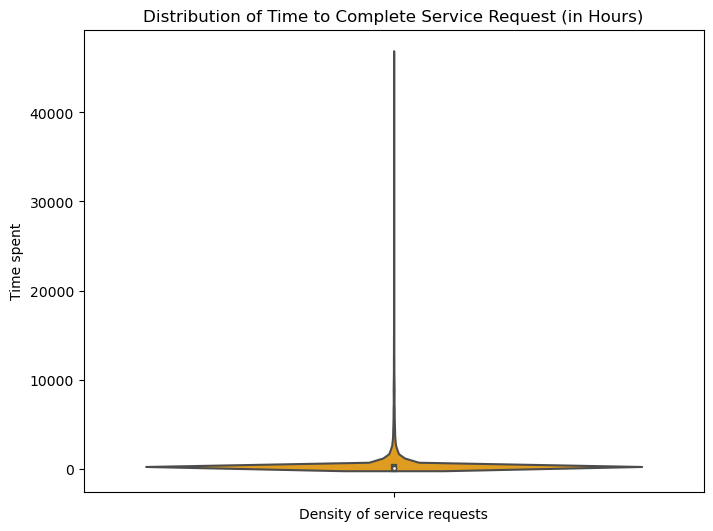

In [15]:
# Create the violin plot 
plt.figure(figsize=(8, 6))
sns.violinplot(data=services311_clustered, y='time_diff_hours', color='orange')
plt.title('Distribution of Time to Complete Service Request (in Hours)')
plt.xlabel('Density of service requests')
plt.ylabel('Time spent')
plt.show()

In [15]:
# Calculate statistics regarding the distribution of time spent to complete the request
services311['time_diff_hours'].describe()

count    2.679849e+06
mean     4.363780e+02
std      2.114092e+03
min     -1.999722e+00
25%      2.346611e+01
50%      7.061778e+01
75%      1.680000e+02
max      4.670400e+04
Name: time_diff_hours, dtype: float64

The summary statistics reveal:
- Count: The number of non-null values in the dataset is approximately 2,676,861.
- Mean: The average time taken to complete a service request is approximately 436.40 hours (approximately 18 days).
- Standard Deviation (Std): The standard deviation is approximately 2,114.54 hours (approximately 88 days).
- Minimum (Min): The minimum value of time_diff_hours is 0 hours (0 days), indicating that there are some service requests that were completed immediately.
- 25th Percentile (25%): 25% of the data points have a time_diff_hours value of 23.51 hours or less. This represents the lower quartile or the first quartile.
- 50th Percentile (50% or Median): 50% of the data points have a time_diff_hours value of 70.68 hours (approximately 3 days) or less. This is the median value and represents the midpoint of the distribution.
- 75th Percentile (75%): 75% of the data points have a time_diff_hours value of 168 hours (approximately 7 days) or less. This represents the upper quartile or the third quartile.
- Maximum (Max): The maximum value of time_diff_hours is 46,704 hours (approximately 1,946 days or 5 years), indicating that there are some service requests that took a significantly longer time to complete.

These statistics provide an overview of the distribution of time taken to complete service requests, including the average, spread, and quartiles of the data, now expressed in both hours and days.

Clustering based on completion time of request were employed to gain insights into patterns and group service requests according to their time of completion.

In [16]:
# Select data for clustering
services311_clustered = services311_clustered[['service_request_id', 'service_name', 'agency_responsible', 'category', 'subcategory', 'department', 'subdepartment', 'time_diff_hours']]

In [17]:
services311_clustered.reset_index(drop=True, inplace=True)

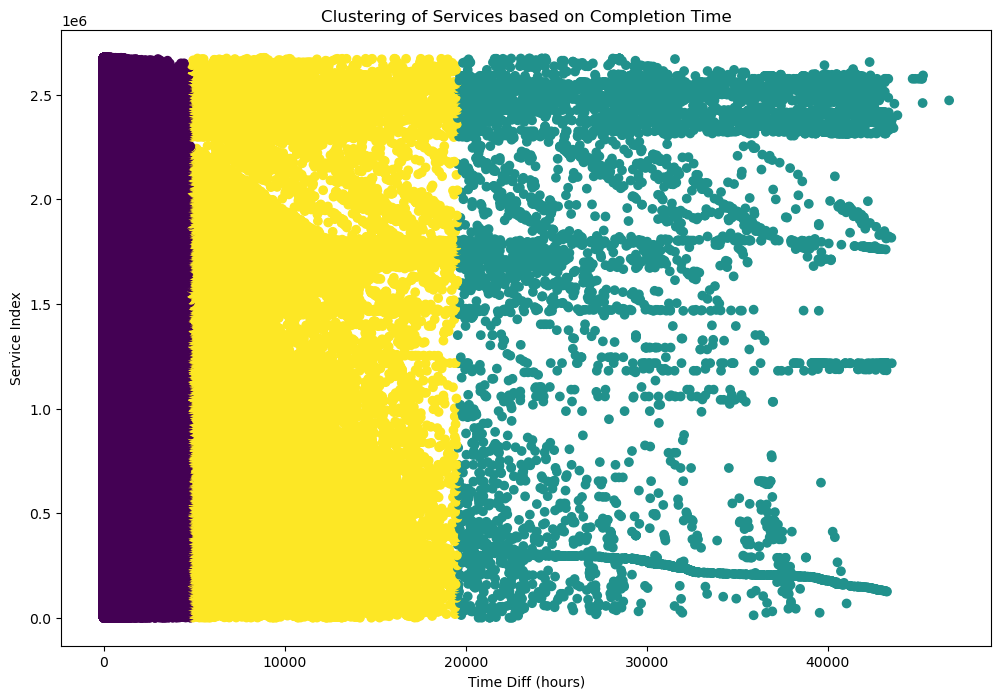

Cluster 0: Count=2627612, Average Time Diff=205.25445648162906 hours
Cluster 2: Count=41153, Average Time Diff=9440.382644118896 hours
Cluster 1: Count=8096, Average Time Diff=29678.166996047425 hours


In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Perform feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(services311_clustered[['time_diff_hours']])

# Choose the number of clusters
num_clusters = 3

# Apply K-means clustering algorithm
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_data)

# Assign cluster labels to the data
services311_clustered.loc[:, 'cluster_label'] = kmeans.labels_.copy()

# Analyze the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_counts = services311_clustered['cluster_label'].value_counts()

# Visualize the clusters
plt.figure(figsize=(12, 8))
plt.scatter(services311_clustered['time_diff_hours'], services311_clustered.index, c=services311_clustered['cluster_label'], cmap='viridis')
plt.xlabel('Time Diff (hours)')
plt.ylabel('Service Index')
plt.title('Clustering of Services based on Completion Time')
plt.savefig('Clusters', bbox_inches='tight', dpi=300)
plt.show()

# Print cluster information
for cluster_label, count in cluster_counts.items():
    cluster_center = cluster_centers[cluster_label][0]
    print(f"Cluster {cluster_label}: Count={count}, Average Time Diff={cluster_center} hours")

The Elbow method was used to find the optimal number of clusters for grouping service requests based on completion time. After analyzing the plot, it was determined that dividing the data into 3 clusters captured a significant amount of variation, making it a suitable choice for clustering.

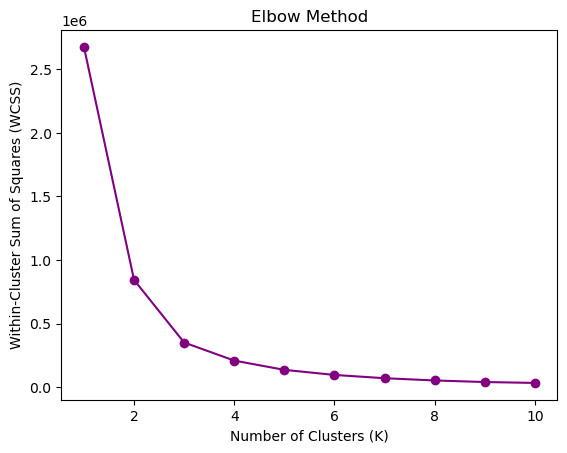

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'data' with the features for clustering

# Initialize an empty list to store the WCSS values
wcss = []

# Define the range of clusters to evaluate
k_values = range(1, 11)

# Perform K-means clustering for each value of K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(k_values, wcss, marker='o', color='purple') 
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

The analysis divides the service requests into three clusters based on completion time. Cluster 0 has the most requests (over 2.6 million) with an average completion time of around 205 hours (≈ 8.5 days). Cluster 2 has a moderate number of requests (41,153) and the average completion time of approximately 9,440 hours (≈ 13 months). Cluster 1 has the fewest requests (8,096) but the longest average completion time of about 29,678 hours (≈ 3.3 years). Below, you can observe the boxplots that depict the distribution of time spent on completing service requests, based on these three classes.

In [22]:
Cluster_0=services311_clustered[services311_clustered['cluster_label']==0]
Cluster_1=services311_clustered[services311_clustered['cluster_label']==1]
Cluster_2=services311_clustered[services311_clustered['cluster_label']==2]

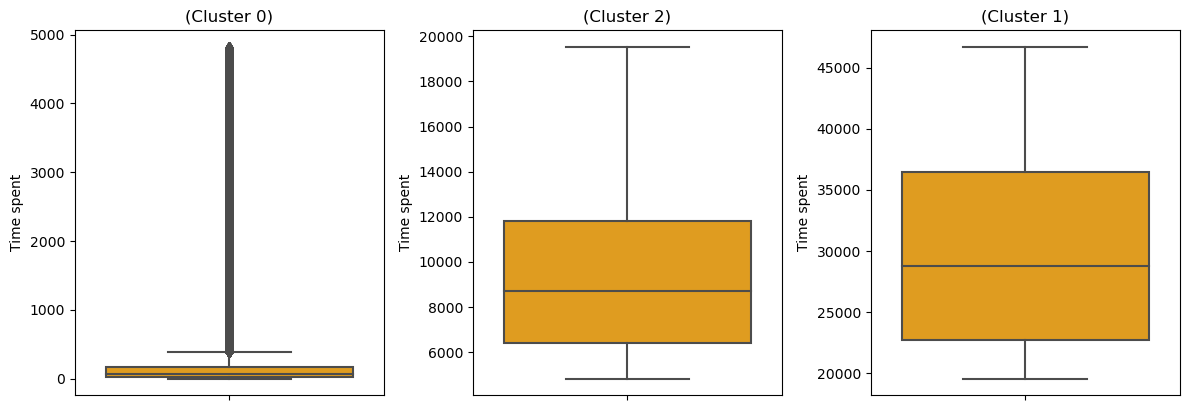

In [26]:
import mplcursors

plt.figure(figsize=(12, 8))

# Define the desired order of clusters
cluster_order = [0, 2, 1]

# Iterate through each cluster in the desired order
for i, cluster_index in enumerate(cluster_order):
    cluster_data = globals()["Cluster_" + str(cluster_index)]  # Get the cluster data by variable name
    plt.subplot(2, 3, i+1)  # Create a subplot for each cluster
    
    sns.boxplot(data=cluster_data, y='time_diff_hours', color='orange')  # Set the color to orange
    plt.title(f'(Cluster {cluster_index})')
    plt.ylabel('Time spent')

    # Add cursor interactivity
    mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(sel.artist.get_label()))

plt.tight_layout()
plt.savefig('Boxplots_Clusters', bbox_inches='tight', dpi=300)
plt.show()


In [24]:
# check what kind of statuses of requests exist
services311_clustered['category'].describe()

count     2676861
unique         86
top         Roads
freq       413089
Name: category, dtype: object

There are 86 unique categories of service requests. Next, I examine if specific service request categories can be grouped based on completion time or if there is no clear relationship between category and completion time. The arrays of categories between three classes were compared.

In [26]:
#Find unique categories for each cluster
array_0=Cluster_0['category'].unique()
array_1=Cluster_1['category'].unique()
array_2=Cluster_2['category'].unique()

In [27]:
# Find the elements that are unique to array1
unique_to_array_0 = set(array_0) - set(array_2)

# Find the elements that are unique to array2
unique_to_array_2 = set(array_2) - set(array_0)

print("Elements unique to array 0:", unique_to_array_0)
print("Elements unique to array 2:", unique_to_array_2)

Elements unique to array 0: {'311 Contact Us', 'COVID', 'GFL', 'Supply', 'Parks PlayBins', 'Eau Claire Area Improvements', '2013 Post Flood Housing Assistance', 'CED', 'BIA Requests', 'Regulatory Affairs', 'Calgary Soccer Centre Inquiry', 'Port-a-Potty Inquiry', 'Playfield Portisan Placement Request', "Mayor's Office", 'Cannabis Inquiries', 'Councillors Office', 'PTR', 'US', 'RE&amp;DS', 'Golf Course Inquiry', 'Fleet and Inventory'}
Elements unique to array 2: set()


In [45]:
#Number of the elements that are unique to array1
len(unique_to_array_0)

21

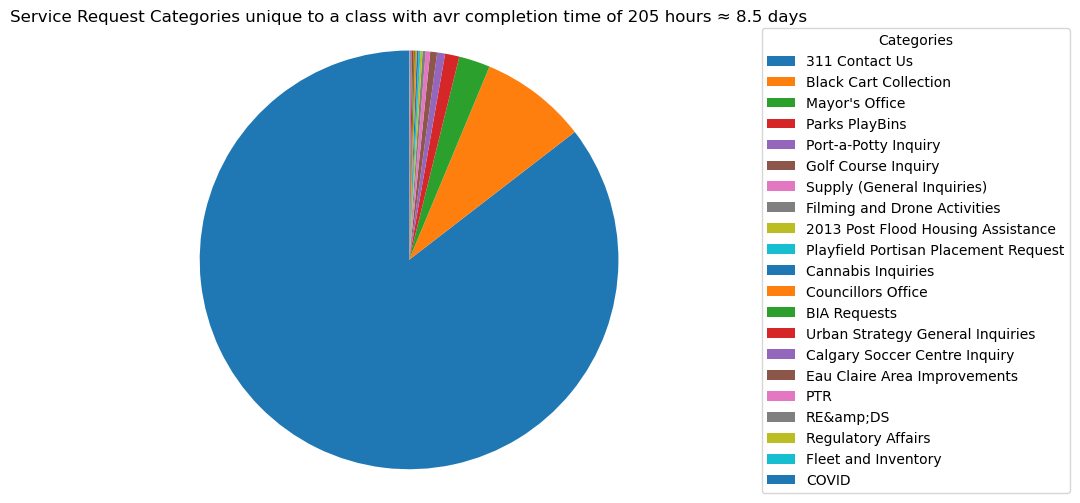

In [61]:
# List of specific categories
specific_categories = [
    '311 Contact Us', 'COVID', 'GFL', 'Supply', 'Parks PlayBins', 'Eau Claire Area Improvements', '2013 Post Flood Housing Assistance', 'CED', 'BIA Requests', 'Regulatory Affairs', 'Calgary Soccer Centre Inquiry', 'Port-a-Potty Inquiry', 'Playfield Portisan Placement Request', "Mayor's Office", 'Cannabis Inquiries', 'Councillors Office', 'PTR', 'US', 'RE&amp;DS', 'Golf Course Inquiry', 'Fleet and Inventory'
]

# Filter the category_counts based on specific_categories
filtered_counts = category_counts[category_counts.index.isin(specific_categories)]

# Custom category labels
custom_labels = {
    'GFL': 'Black Cart Collection',
    'RE&DS': 'Real Estate and Development Services',
    'Supply': 'Supply (General Inquiries)',
    'CED': 'Filming and Drone Activities',
    'US': 'Urban Strategy General Inquiries',
}

# Create a figure with two subplots: pie chart and legend
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1])

# Plot the pie chart on the left subplot
ax1 = plt.subplot(gs[0])
wedges, _ = ax1.pie(filtered_counts, labels=None, startangle=90)
ax1.axis('equal')
ax1.set_title('Service Request Categories unique to a class with avr completion time of 205 hours ≈ 8.5 days')

# Create the legend on the right subplot
ax2 = plt.subplot(gs[1])
legend_labels = [custom_labels.get(category, category) for category in filtered_counts.index]
ax2.legend(wedges, legend_labels, loc='center', bbox_to_anchor=(0.5, 0.5), title='Categories')

# Hide unnecessary elements in the right subplot
ax2.axis('off')
plt.savefig('Piechart_205_h', bbox_inches='tight', dpi=300)
plt.show()


The unique elements in array 0 include service requests such as ‘311 Contact Us’, ‘Black Cart Collection’, ‘Mayor’s Office, ‘Parks PlayBins’, and others. These services (21 categories from 86) are distinct to Cluster 0, indicating that they are predominantly associated with this cluster and their average completion time is of around 205 hours or ≈ 8.5 days.

In [28]:
# Find the elements that are unique to array1
unique_to_array_1 = set(array_1) - set(array_2)

# Find the elements that are unique to array2
unique_to_array_2 = set(array_2) - set(array_1)

print("Elements unique to array 1:", unique_to_array_1)
print("Elements unique to array 2:", unique_to_array_2)

Elements unique to array 1: set()
Elements unique to array 2: {'2026 Olympic Bid Feedback', 'New Recreation Facilities', 'Customer Service & Communications', 'After Hours Transit', 'Calgary 911', 'RE&DS', 'Partnerships', 'DBBS', 'Finance', 'REC', 'UEP', 'Roads Permits', 'Calgary Safety Expo', 'City Auditors', 'Z', 'ESM', 'Development Compliance', 'Parks Seasonal Vendor Application', 'Calgary Housing', 'CGS', "City Clerk's"}


In [46]:
#Number of the elements that are unique to arrays 2,0
len(unique_to_array_2)

21

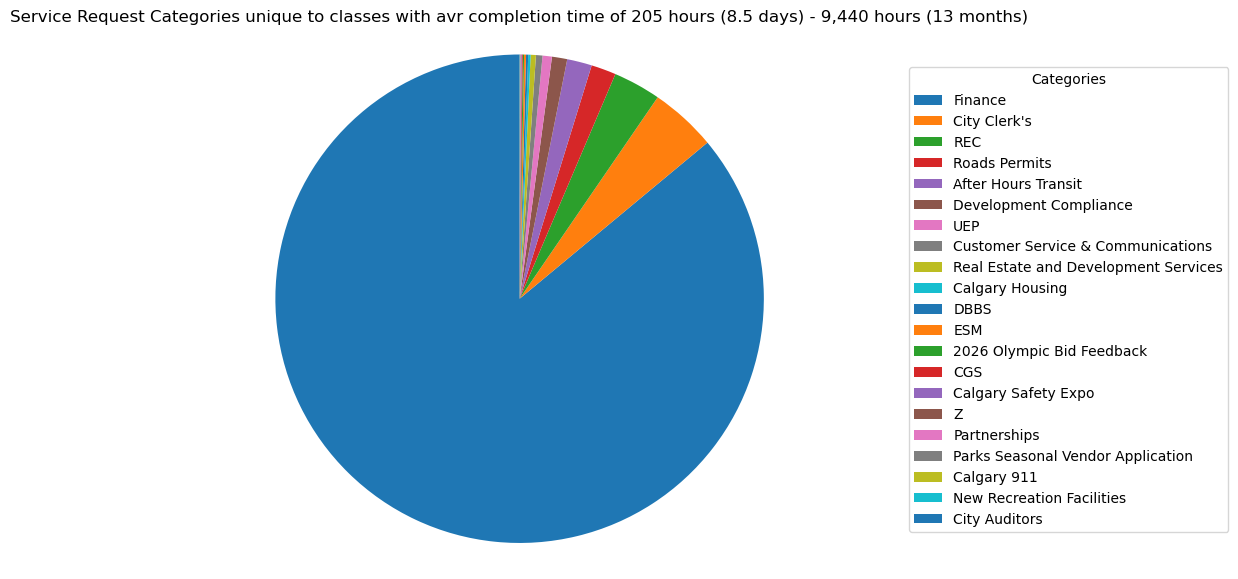

In [59]:
# List of specific categories
specific_categories = [
    '2026 Olympic Bid Feedback', 'New Recreation Facilities', 'Customer Service & Communications', 'After Hours Transit', 'Calgary 911', 'RE&DS', 'Partnerships', 'DBBS', 'Finance', 'REC', 'UEP', 'Roads Permits', 'Calgary Safety Expo', 'City Auditors', 'Z', 'ESM', 'Development Compliance', 'Parks Seasonal Vendor Application', 'Calgary Housing', 'CGS', "City Clerk's"
]

# Filter the category_counts based on specific_categories
filtered_counts = category_counts[category_counts.index.isin(specific_categories)]

# Custom category labels
custom_labels = {
    'GFL': 'Black Cart Collection',
    'RE&DS': 'Real Estate and Development Services',
    'Supply': 'Supply (General Inquiries)',
    'CED': 'Filming and Drone Activities',
    'US': 'Urban Strategy General Inquiries',
}

# Create a figure with two subplots: pie chart and legend
fig = plt.figure(figsize=(13, 7))
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1])

# Plot the pie chart on the left subplot
ax1 = plt.subplot(gs[0])
wedges, _ = ax1.pie(filtered_counts, labels=None, startangle=90)
ax1.axis('equal')
ax1.set_title('Service Request Categories unique to classes with avr completion time of 205 hours (8.5 days) - 9,440 hours (13 months)')

# Create the legend on the right subplot
ax2 = plt.subplot(gs[1])
legend_labels = [custom_labels.get(category, category) for category in filtered_counts.index]
ax2.legend(wedges, legend_labels, loc='center', bbox_to_anchor=(0.5, 0.5), title='Categories')

# Hide unnecessary elements in the right subplot
ax2.axis('off')
plt.savefig('Piechart_13_mon', bbox_inches='tight', dpi=300)
plt.show()

The elements in array 2 and 0 include service requests such as ‘Finance’, ‘City Clerk’s’, ‘Road permits, and others. These services (21 categories from 86) are distinct to both Cluster 0 and Cluster 2, indicating that they are associated with these clusters and their average completion times is of around 205 hours (8.5 days) — 9,440 hours (13 months).

Out of the 86 service request categories, the remaining 44 categories are present in each of the three clusters. These categories have completion times ranging from 205 hours (approximately 9 days) to 29,678 hours (approximately 3.3 years). This indicates a significant variation in the completion times for these categories.

# Conclusion

In conclusion, this data analysis of Calgary’s 311 Service Requests provides valuable insights into the urban landscape and residents’ engagement with city services. The analysis addresses key inquiries related to the types of service requests, responsible city departments, volume and patterns of requests over time, geographical distribution, and response time.

The most common types of service requests include road-related issues, building inspections, waste and recycling services, finance-related inquiries, and park-related requests. These highlight the community’s focus on transportation infrastructure, safety standards, environmental sustainability, financial management, and outdoor spaces.

The Calgary Community Standards department, Calgary Transit, and the Utilities & Environmental Protection department play significant roles in resolving the majority of service requests. This underscores the importance of maintaining community standards, providing efficient public transportation, and emphasizing sustainable practices.

The volume of service requests exhibits seasonality, with higher demand during the summer months. There is also a higher workload during weekdays compared to weekends, indicating potential patterns in request completion delays and resource allocation.

Geographically, the Downtown Commercial Core and Beltline areas demonstrate the highest concentration of service requests, reflecting their vibrant nature with numerous businesses and residential complexes. Bowness, known for its popular park, and Saddle Ridge, possibly due to various factors like population density, also stand out in terms of service requests.

The response time for resolving service requests shows significant variation, with an average of approximately 500 hours. Clustering based on completion time reveals three clusters, with Cluster 0 having the most requests and the shortest average completion time, Cluster 1 having the fewest requests and the longest completion time, and Cluster 2 falling in between.

Residents often seek timely resolutions to their inquiries or service needs. However, without an understanding of how long it may take to address their specific request, they may feel frustrated or uncertain about the progress. By establishing time frames for different categories of services, residents can have a better understanding of the expected turnaround time for their specific type of request.

For example, road-related requests may have a shorter time frame since they often require immediate attention to ensure public safety and maintain smooth traffic flow. On the other hand, more complex requests, such as building inspections or regulatory affairs, may involve multiple steps or involve coordination with different departments, requiring a longer time frame for completion.

Implementing time frames can also benefit city departments by providing them with a framework to prioritize and allocate resources effectively. By having a clear understanding of the expected completion times for different categories of services, departments can manage their workload, streamline processes, and optimize their service delivery.

# References 

City of Calgary. (2023). 311 Service Requests. Retrieved from https://data.calgary.ca/Services-and-Amenities/311-Service-Requests/iahh-g8bj